<a href="https://colab.research.google.com/github/frknnoztrkk/Aygaz_Goruntu_Isleme/blob/main/goruntu_isleme_bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AYGAZ GÖRÜNTÜ İŞLEME PROJESİ

##1- Veri Setini Kullanma
###1.1- Kaggle Veri Kaynağını İçe Aktarma
Bu hücre, Kaggle'dan **"Animals with Attributes 2"** veri setini indiriyor. Veri kaynağı başarıyla indirildikten sonra, diğer analizlere geçebiliriz. Veriyi kullanmadan önce, `kagglehub` kütüphanesini kullanarak veri kaynağını içe aktarıyoruz.

Aşağıdaki kod, veriyi içe aktarmak için gerekli işlemi gerçekleştirecektir:


In [ ]:
import kagglehub
rrebirrth_animals_with_attributes_2_path = kagglehub.dataset_download('rrebirrth/animals-with-attributes-2')

print('Data source import complete.')


Resuming download from 3656384512 bytes (10270357907 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/rrebirrth/animals-with-attributes-2?dataset_version_number=1 (3656384512/13926742419) bytes left.


100%|██████████| 13.0G/13.0G [01:50<00:00, 92.9MB/s]

Extracting files...


Data source import complete.


##2- Veri Setini Hazırlama
###2.1- Görsellerin Yolu ve Hayvan Türlerinin Belirlenmesi
Bu hücrede, her bir hayvan türüne ait görsel dosyalarının yollarını bulmak için bir Python scripti çalıştırıyoruz. **`os.walk()`** fonksiyonu kullanarak, belirli bir dizin yapısında gezinip her bir hayvan türüne ait görsellerin yollarını topluyoruz.

#### Aşağıdaki adımlar takip edilmektedir:
1. **Hayvan Listesi:** "collie", "dolphin", "elephant", "fox", "moose", "rabbit", "sheep", "squirrel", "giant panda", ve "polar bear" gibi hayvanlar tanımlanmıştır.
2. **Dizin Yapısında Arama:** Belirtilen dizindeki her bir alt dizinde bu hayvanların görselleri aranır.
3. **Yolların Toplanması:** Eğer bir alt dizin, hayvanın adını içeriyorsa, o dizindeki tüm görsel dosyalarının yolları **`image_paths`** sözlüğüne eklenir.

Kod, her bir hayvan türü için görsel dosya sayısını yazdırarak hangi hayvandan kaç tane görsel bulunduğunu gösterir.



In [ ]:
import os

image_paths = {}

base_path = "/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImages/"

animals = ["collie", "dolphin", "elephant", "fox", "moose", "rabbit", "sheep", "squirrel", "giant+panda", "polar+bear"]

for dirname, _, filenames in os.walk(base_path):
    for animal in animals:
        if animal in dirname:
            if animal not in image_paths:
                image_paths[animal] = []
            for filename in filenames:
                image_paths[animal].append(os.path.join(dirname, filename))

for animal, paths in image_paths.items():
    print(f"{animal}: {len(paths)} images")


giant+panda: 874 images
elephant: 1038 images
polar+bear: 868 images
rabbit: 1088 images
moose: 704 images
dolphin: 946 images
squirrel: 1200 images
fox: 664 images
sheep: 1420 images
collie: 1028 images


###2.2- Görsellerin İşlenmesi ve Etiketlenmesi
Bu hücrede, her bir hayvan sınıfı için görsellerin işlenmesi ve etiketlenmesi işlemi yapılmaktadır. Aşağıdaki adımlar takip edilmektedir:

1. **Resimlerin Boyutlandırılması:** Her bir görsel 128x128 boyutlarına yeniden boyutlandırılır.
2. **Görsel Normalizasyonu:** Resimler, piksel değerleri 0 ile 1 arasında olacak şekilde normalize edilir.
3. **Etiketleme:** Her bir hayvan sınıfı, `class_mapping` sözlüğü kullanılarak sayısal etiketlerle etiketlenir.
4. **Veri Hazırlığı:** Görseller ve etiketler, `X` ve `y` listelerine eklenir, ardından bu listeler numpy dizilerine dönüştürülür.

Her hayvan sınıfından yalnızca ilk **650 görsel** seçilir, böylece modelin eğitiminde kullanılacak veri kümesi belirlenmiş olur.

Aşağıdaki kod, bu işlemleri gerçekleştirmektedir:


In [ ]:
import cv2
import numpy as np
import os
import random
from sklearn.model_selection import train_test_split

image_size = (128, 128)

X = []
y = []

animal_classes = ["collie", "dolphin", "elephant", "fox", "moose", "rabbit", "sheep", "squirrel", "giant panda", "polar bear"]

class_mapping = {animal: idx for idx, animal in enumerate(animal_classes)}

for animal in animal_classes:
    animal_paths = image_paths.get(animal, [])

    animal_paths = animal_paths[:650]

    for img_path in animal_paths:
        img = cv2.imread(img_path)

        img_resized = cv2.resize(img, image_size)

        img_normalized = img_resized / 255.0

        X.append(img_normalized)
        y.append(class_mapping[animal])

X = np.array(X)
y = np.array(y)

print(f"Image data shape: {X.shape}")
print(f"Label data shape: {y.shape}")


Image data shape: (5200, 128, 128, 3)
Label data shape: (5200,)


###2.3- Eğitim ve Test Verilerine Bölme
Bu hücrede, hazırlanan veri kümesi **eğitim** ve **test** verilerine bölünmektedir. **`train_test_split`** fonksiyonu kullanılarak veri kümesi, %70 eğitim verisi ve %30 test verisi olmak üzere ikiye ayrılır. Eğitim verisi, modelin eğitilmesi için kullanılacakken, test verisi modelin doğruluğunu değerlendirmek için kullanılacaktır.

#### Kod:


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (3640, 128, 128, 3)
Test data shape: (1560, 128, 128, 3)


###2.4- Görsel Artırma (Data Augmentation)
Bu hücrede, **görsel artırma (data augmentation)** işlemi yapılmaktadır. Görsel artırma, eğitim verisini çeşitlendirmek amacıyla, görseller üzerinde çeşitli rastgele dönüşümler uygulayarak modelin genel performansını artırmaya yardımcı olur. **`ImageDataGenerator`** sınıfı ile aşağıdaki dönüşümler uygulanmaktadır:

- **Dönme (Rotation)**: Görselleri rastgele 20 derece döndürme.
- **Yatay/ Dikey Kaydırma (Width/Height Shift)**: Görselleri yatay ve dikey yönde %20 kaydırma.
- **Eğme (Shear)**: Görselleri rastgele eğme (shear).
- **Yakınlaştırma (Zoom)**: Görselleri rastgele %20 oranında yakınlaştırma.
- **Yatay Çevirme (Horizontal Flip)**: Görselleri rastgele yatay olarak çevirme.
- **Eksik Piksel Doldurma (Fill Mode)**: Görsellerin kenarındaki eksik piksel değerlerini en yakın komşu piksel ile doldurma.

Eğitim verilerine bu dönüşümleri uyguladıktan sonra, artırılmış görselleri **`datagen.flow()`** ile bir araya getiririz. Bu işlem, her seferinde 32 örneklik bir veri kümesi döndürür.

#### Kod:


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

datagen.fit(X_train)

augmented_images = datagen.flow(X_train, y_train, batch_size=32)

print(f"Number of augmented batches: {len(augmented_images)}")


Number of augmented batches: 114


##3- Konvolüsyonel Sinir Ağı Modeli (CNN) Tanımlama
Bu hücrede, **Konvolüsyonel Sinir Ağı (CNN)** modelinin yapısını tanımlıyoruz. Model, görüntü sınıflandırma için üç konvolüsyonel katmandan (Conv2D) ve bir çıkış katmanından (Dense) oluşmaktadır. Modelde, aşırı öğrenmeyi engellemek için **Dropout** katmanları da eklenmiştir.

Modelin katmanları şunlardır:

1. **İlk Konvolüsyonel Katman:**
   - 32 filtre, 3x3 boyutunda
   - Aktivasyon fonksiyonu: **ReLU**
   - Max pooling: 2x2
   - Dropout oranı: **%30**

2. **İkinci Konvolüsyonel Katman:**
   - 64 filtre, 3x3 boyutunda
   - Aktivasyon fonksiyonu: **ReLU**
   - Max pooling: 2x2
   - Dropout oranı: **%40**

3. **Üçüncü Konvolüsyonel Katman:**
   - 128 filtre, 3x3 boyutunda
   - Aktivasyon fonksiyonu: **ReLU**
   - Max pooling: 2x2
   - Dropout oranı: **%40**

4. **Flatten ve Fully Connected Katman:**
   - **Flatten**: 2D veriyi 1D'ye dönüştürür.
   - **Dense**: 512 nöronlu tam bağlı katman, **ReLU** aktivasyonu
   - Dropout oranı: **%50**

5. **Çıkış Katmanı:**
   - 10 sınıf için çıkış (softmax aktivasyonu ile)
   - Kullanılan kayıp fonksiyonu: **sparse_categorical_crossentropy**

#### Modelin derlenmesi:
- **Optimizer:** Adam (öğrenme oranı: 0.0001)
- **Kaybı:** sparse_categorical_crossentropy
- **Metriği:** doğruluk (accuracy)

Kodun çıktısında, modelin yapısı ve her katmanın parametreleri yazdırılacaktır.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Modeli tanımlama
model = Sequential()

# İlk konvolüsyonel katman
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# İkinci konvolüsyonel katman
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

# Üçüncü konvolüsyonel katman
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

# Flatten ve fully connected katman
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output layer (10 sınıf için)
model.add(Dense(10, activation='softmax'))

# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model özetini yazdırma
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,943,946 (49.38 MB)

 Trainable params: 12,943,946 (49.38 MB)

 Non-trainable params: 0 (0.00 B)

##4- Modeli Eğitme
Bu hücrede, tanımladığımız CNN modelini eğitim verisi üzerinde eğitiyoruz. **`model.fit()`** fonksiyonu ile modelin **30 epoch** boyunca eğitim yapması sağlanıyor. Eğitimi gerçekleştirdiğimiz veriler:

- **Eğitim Verisi:** `X_train`, `y_train`
- **Doğrulama Verisi:** `X_test`, `y_test`

#### Parametreler:
- **Epoch Sayısı:** 30 (Model 30 kez eğitim verileri üzerinde geçecek)
- **Batch Boyutu:** 32 (Her bir iterasyonda 32 örnek kullanılacak)

Eğitim sırasında her epoch sonunda, modelin doğruluk ve kayıp (loss) değerleri hesaplanacak ve doğrulama (validation) verisi üzerinde de modelin performansı değerlendirilecektir.

Kodun çıktısı, eğitim sürecinde modelin her epoch için doğruluk ve kayıp değerlerini gösterecektir.



In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=30,  # Epoch sayısını artırdık
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.1987 - loss: 2.0928 - val_accuracy: 0.2923 - val_loss: 1.9679
Epoch 2/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.3180 - loss: 1.7565 - val_accuracy: 0.3917 - val_loss: 1.9007
Epoch 3/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.3653 - loss: 1.6596 - val_accuracy: 0.4256 - val_loss: 1.8573
Epoch 4/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.3953 - loss: 1.6115 - val_accuracy: 0.4288 - val_loss: 1.7997
Epoch 5/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.4166 - loss: 1.5789 - val_accuracy: 0.4135 - val_loss: 1.7317
Epoch 6/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.4557 - loss: 1.4962 - val_accuracy: 0.4500 - val_loss: 1.6689
Epoch 7/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.4887 - loss: 1.4264 - val_accuracy: 0.4494 - val_loss: 1.6478
Epoch 8/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.5019 - loss: 1.3745 - val_accu

###4.1- Modeli Test Etme ve Sonuçları Değerlendirme
Bu hücrede, eğitilen modeli test veri seti üzerinde değerlendiriyoruz. **`model.evaluate()`** fonksiyonu kullanılarak, test verisi üzerindeki modelin doğruluk (accuracy) ve kayıp (loss) değerleri hesaplanır.

#### Parametreler:
- **Test Verisi:** `X_test`, `y_test`
- **Verbose:** 2 (Eğitim sırasında daha az çıktı verir, sadece final sonuçları gösterir)

Sonuç olarak, **test doğruluğu** (`test_acc`) yüzdelik olarak yazdırılır ve modelin test verisi üzerindeki performansı değerlendirilir.

#### Kod:

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")


49/49 - 14s - 289ms/step - accuracy: 0.6103 - loss: 1.1378
Test accuracy: 61.03%


##5- Görselleri Manipüle Etme ve Kaydetme
Bu hücrede, test verisindeki her bir görsel üzerinde **ışık manipülasyonu** işlemi uygulanarak, görsellerin parlaklık seviyeleri rastgele bir faktörle değiştirilir. Manipüle edilen görseller daha sonra belirtilen bir klasöre kaydedilir. Ayrıca, her 100. görselde manipülasyonun görsel çıktısı ekranda gösterilir.

#### Adımlar:
1. **Görselin Değiştirilmesi:**
   - Görsellerin parlaklık seviyesi rastgele bir faktör ile değiştirilir. **Parlaklık faktörü** 0.5 ile 1.5 arasında seçilir.
   - **`cv2.convertScaleAbs()`** fonksiyonu ile parlaklık manipülasyonu yapılır.
   
2. **Kaydetme ve Görüntüleme:**
   - Manipüle edilen görseller, **`manipulated_images`** adında bir klasöre kaydedilir.
   - Her 100. görsel için **`matplotlib`** kullanılarak görsel ekranda gösterilir.

#### Kod:


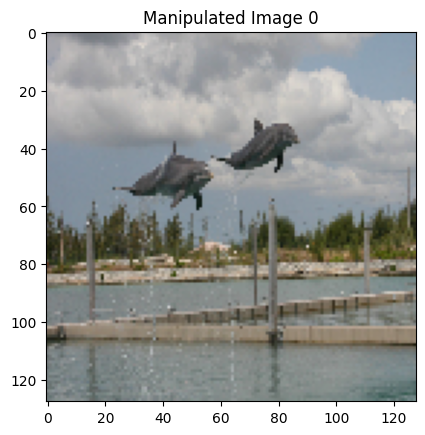

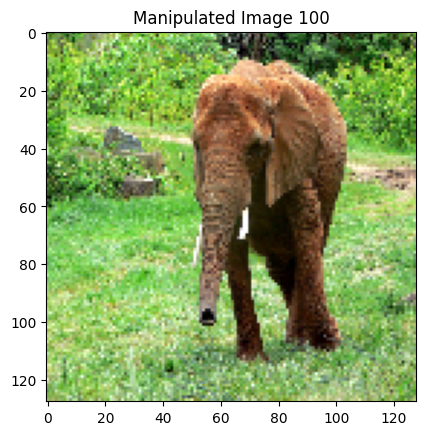

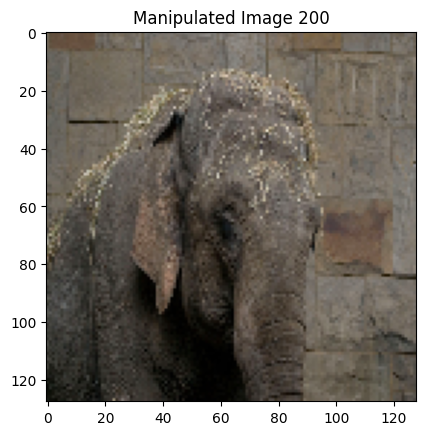

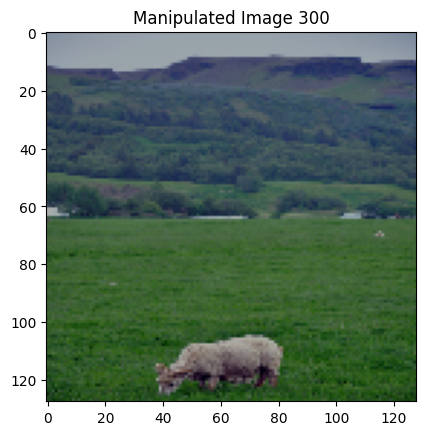

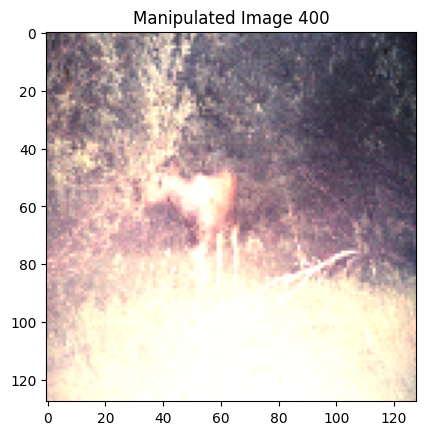

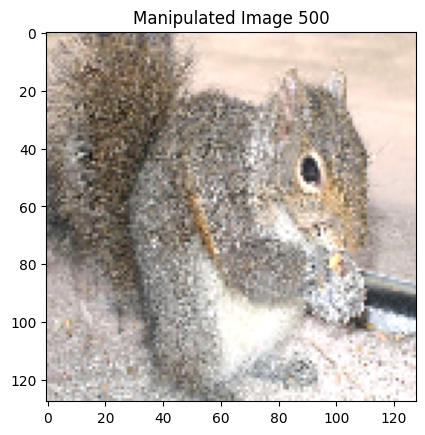

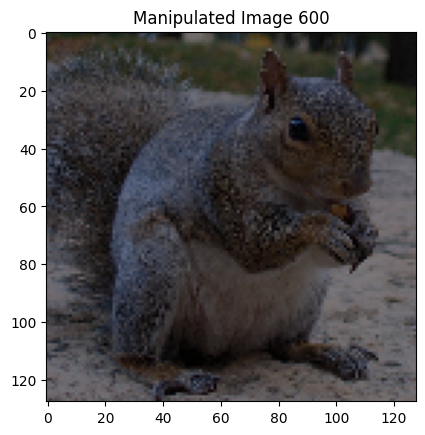

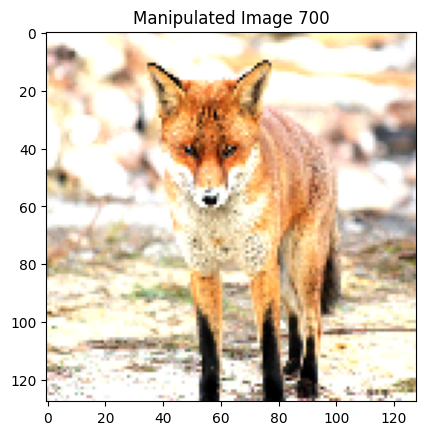

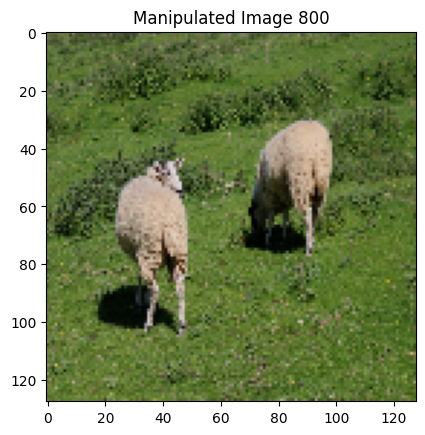

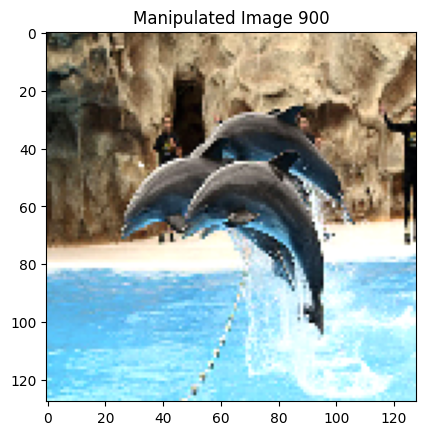

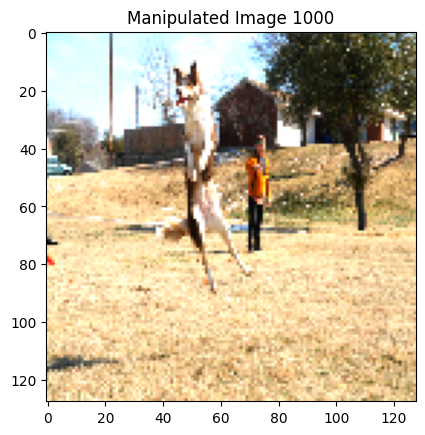

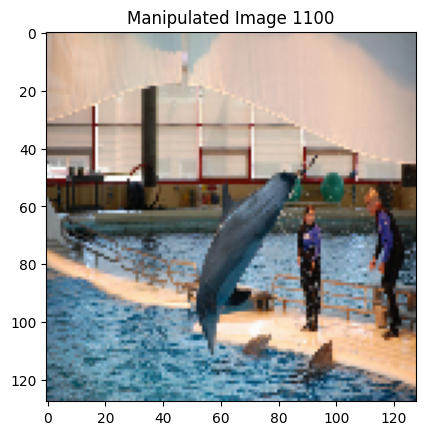

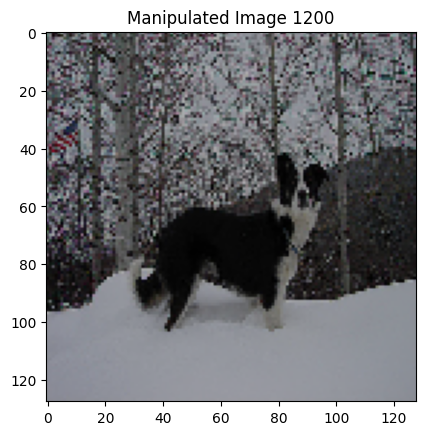

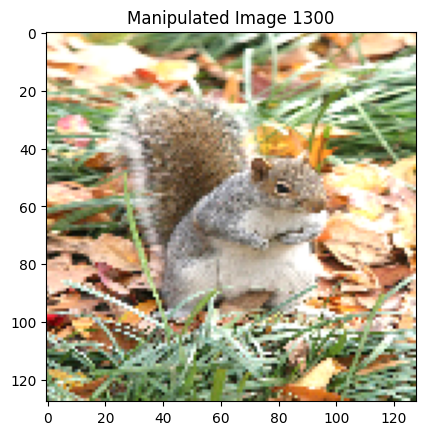

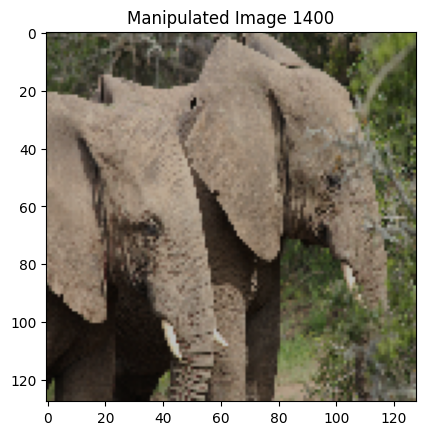

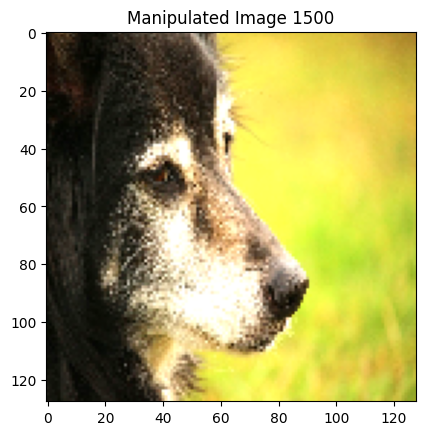

In [ ]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def manipulate_and_save_images(X_test, output_dir="manipulated_images"):
    # Eğer çıktı klasörü yoksa oluştur
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Her bir resmi manipüle et ve kaydet
    for i, img in enumerate(X_test):
        # Resmi 0-255 arasında bir değere dönüştür
        img = np.array(img * 255.0, dtype=np.uint8)

        # Işık manipülasyonu: Parlaklık değeri 0.5 ile 1.5 arasında rastgele seçilecek
        brightness_factor = np.random.uniform(0.5, 1.5)

        # Parlaklık manipülasyonu
        manipulated_img = cv2.convertScaleAbs(img, alpha=brightness_factor, beta=0)

        # Resmi kaydet
        img_name = f"manipulated_img_{i}.jpg"
        img_path = os.path.join(output_dir, img_name)
        cv2.imwrite(img_path, manipulated_img)

        # (İsteğe bağlı) Manipüle edilmiş resmi ekranda göster
        if i % 100 == 0:  # her 100. resim
            plt.imshow(cv2.cvtColor(manipulated_img, cv2.COLOR_BGR2RGB))
            plt.title(f"Manipulated Image {i}")
            plt.show()

# Test verisi üzerindeki resimleri manipüle et ve kaydet
manipulate_and_save_images(X_test)


###5.1- Google Drive'ı Colab ile Bağlama
Bu hücrede, Google Drive'ınızı Colab ortamına bağlamak için gerekli kodu çalıştırıyoruz. Colab ile Google Drive entegrasyonu, verilerinizi doğrudan Drive'ınızdan yüklemenizi ve kaydetmenizi sağlar.

#### Adımlar:
1. **Google Drive'ı Bağlama:**
   - **`drive.mount('/content/drive')`** komutu, Google Drive'ı Colab'a bağlar ve bir doğrulama istemi görüntüler.
   - Doğrulama işlemi, Google hesabınızla giriş yaparak Drive'ınıza erişim izni vermenizi gerektirir.

2. **Bağlantı Başarılı Olduktan Sonra:**
   - Başarıyla bağlandığında, Drive'ınızdaki dosyalara **`/content/drive/`** dizini üzerinden erişebilirsiniz.

#### Kod:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###5.2- Görsellerde Parlaklık Manipülasyonu ve Kaydetme
Bu hücrede, test verisi üzerinde parlaklık manipülasyonu yapılmakta ve manipüle edilen görseller belirtilen bir klasöre kaydedilmektedir. **`get_manipulated_images`** fonksiyonu, her bir görselin parlaklık seviyesini rastgele değiştirir ve değiştirilen görselleri bir dizide saklar.

#### Adımlar:
1. **Parlaklık Manipülasyonu:**
   - Her bir görselin parlaklık değeri, **0.5 ile 1.5** arasında rastgele seçilen bir faktörle değiştirilir.
   - Parlaklık değişikliği için **`PIL.Image.point()`** fonksiyonu kullanılır.

2. **Görselleri Kaydetme:**
   - Manipüle edilen her görsel, belirtilen **`/content/drive/MyDrive/Aygaz_Goruntu_Isleme`** klasörüne kaydedilir.
   - Görseller **JPEG** formatında kaydedilir.

3. **Manipüle Edilen Görsellerin Dizisi:**
   - Manipüle edilen görseller bir dizide saklanır ve bu dizin **`numpy array`** olarak döndürülür.

#### Kod:


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import save_img, img_to_array, array_to_img

def get_manipulated_images(images, save_path):
    # Eğer hedef klasör yoksa oluştur
    os.makedirs(save_path, exist_ok=True)

    manipulated_images = []
    for i, img in enumerate(images):
        # Parlaklık manipülasyonu
        brightness_factor = np.random.uniform(0.5, 1.5)  # Rastgele parlaklık değişikliği
        manipulated_img = array_to_img(img)
        manipulated_img = manipulated_img.point(lambda p: p * brightness_factor)

        # Manipüle edilen resmi numpy array olarak sakla
        manipulated_images.append(img_to_array(manipulated_img))

        # Dosyaya kaydet
        save_img(os.path.join(save_path, f"manipulated_img_{i}.jpg"), manipulated_img)

    return np.array(manipulated_images)

# Kullanım
save_path = '/content/drive/MyDrive/Aygaz_Goruntu_Isleme/manipulated_images'
manipulated_images = get_manipulated_images(X_test, save_path)


##6- Manipüle Edilmiş Test Verisi ile Modeli Değerlendirme
Bu hücrede, parlaklık manipülasyonu yapılan görselleri yükleyip modelle değerlendirmeye tabi tutuyoruz. Manipüle edilmiş görseller, önce uygun boyutlara getirilip, ardından modelin girişine uygun şekilde işleniyor.

#### Adımlar:
1. **Manipüle Edilmiş Görselleri Yükleme:**
   - Manipüle edilen her görsel, **`load_img()`** fonksiyonu ile yüklenir ve modelin kabul ettiği boyut olan **128x128** boyutuna yeniden boyutlandırılır.
   
2. **Görselleri Numpy Array'e Çevirme:**
   - **`img_to_array()`** fonksiyonu ile görseller, modelin girişine uygun numpy array formatına dönüştürülür.
   - Görseller, **0 ile 1 arasında normalize edilir**.

3. **Model Değerlendirme:**
   - Manipüle edilmiş test verisi üzerinde modelin performansı **`model.evaluate()`** fonksiyonu ile test edilir.
   - Test kaybı (loss) ve doğruluk (accuracy) hesaplanır.

#### Kod:


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Manipüle edilmiş görüntüleri yükleyip modele uygun forma dönüştürme
manipulated_test_images = []
for i in range(len(X_test)):  # X_test boyutuna göre kaç resim olduğunu kontrol ediyoruz
    img_path = os.path.join(save_path, f"manipulated_img_{i}.jpg")
    img = load_img(img_path, target_size=(128, 128))  # Modelin input_shape boyutuna uygun
    img_array = img_to_array(img)
    manipulated_test_images.append(img_array)

# Listeyi numpy array'e çevir ve normalize et
manipulated_test_images = np.array(manipulated_test_images) / 255.0

# Modeli manipüle edilmiş test setinde değerlendir
manipulated_test_loss, manipulated_test_accuracy = model.evaluate(manipulated_test_images, y_test, verbose=1)
print(f"Manipulated Test Accuracy: {manipulated_test_accuracy * 100:.2f}%")


49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 318ms/step - accuracy: 0.5920 - loss: 1.2103
Manipulated Test Accuracy: 60.90%


##7- Renk Sabitlemesi (White Balance) Uygulama

Bu kod parçası, verilen bir dizi görüntüye renk sabitlemesi (white balance) uygulayarak her bir kanalın (kırmızı, yeşil, mavi) dengesini sağlıyor. Renk sabitlemesi, görseldeki renk bozulmalarını düzeltmek ve daha doğal bir renk tonu elde etmek amacıyla kullanılır.

#### Adımlar:

1. **Gri Tonlamaya Dönüşüm:**
   - Her bir görüntü, `skimage.color.rgb2gray()` fonksiyonu ile gri tonlamaya dönüştürülür. Gri tonlama, renk sabitlemesi için referans olarak kullanılır.

2. **Renk Kanallarının Ortalama Değerlerinin Hesaplanması:**
   - Görüntüdeki kırmızı, yeşil ve mavi renk kanallarının ortalama değerleri hesaplanır.
   - Aynı zamanda, bu görüntünün gri tonlamadaki ortalama değeri de hesaplanır.

3. **Ölçekleme Faktörlerinin Hesaplanması:**
   - Her renk kanalı için, kanalın ortalama değeri ile gri tonlamadaki ortalama değer arasındaki oran hesaplanır.
   - Bu oran, her bir kanalın renk dengesini düzeltmek için kullanılacak ölçekleme faktörüdür:
     - `scale_r = mean_gray / mean_r`
     - `scale_g = mean_gray / mean_g`
     - `scale_b = mean_gray / mean_b`

4. **Ölçeklemenin Uygulanması:**
   - Hesaplanan ölçekleme faktörleri, her bir renk kanalına (kırmızı, yeşil, mavi) uygulanarak kanalın renk yoğunluğu denetlenir. Bu işlemle, her bir kanalın renk dengesi gri tonlamaya uyumlu hale getirilir.
   - `np.clip()` fonksiyonu kullanılarak, renk kanalının değerleri 0 ile 255 arasında sınırlandırılır.

5. **Sonuçların Kaydedilmesi:**
   - Renk sabitlemesi yapılmış olan görüntüler, belirtilen bir dizine (`/content/drive/MyDrive/Aygaz_Goruntu_Isleme`) kaydedilir.
   - Görüntüler, `wb_img_{i}.jpg` formatında isimlendirilir.

6. **Çıktı:**
   - Renk sabitlemesi yapılmış görüntüler numpy dizisi olarak döndürülür.

#### Kod:



In [ ]:
import os
import numpy as np
from skimage import color
from skimage.exposure import is_low_contrast
from skimage.io import imread, imsave

def get_wb_images(images, save_path):
    # Eğer hedef klasör yoksa oluştur
    os.makedirs(save_path, exist_ok=True)

    wb_images = []
    for i, img in enumerate(images):
        # RGB'yi gri ölçeğe dönüştür
        gray = color.rgb2gray(img)

        # Ortalama gri değerine göre renk sabitlemesi
        mean_r = np.mean(img[:, :, 0])  # Kırmızı kanal
        mean_g = np.mean(img[:, :, 1])  # Yeşil kanal
        mean_b = np.mean(img[:, :, 2])  # Mavi kanal
        mean_gray = np.mean(gray)  # Ortalama gri değer

        # Kanal başına ölçekleme faktörü
        scale_r = mean_gray / mean_r
        scale_g = mean_gray / mean_g
        scale_b = mean_gray / mean_b

        # Uygula
        wb_img = img.copy()
        wb_img[:, :, 0] = np.clip(wb_img[:, :, 0] * scale_r, 0, 255)
        wb_img[:, :, 1] = np.clip(wb_img[:, :, 1] * scale_g, 0, 255)
        wb_img[:, :, 2] = np.clip(wb_img[:, :, 2] * scale_b, 0, 255)

        wb_images.append(wb_img)

        # Renk sabitlenmiş resmi kaydet
        imsave(os.path.join(save_path, f"wb_img_{i}.jpg"), wb_img.astype(np.uint8))

    return np.array(wb_images)


###7.1- Renk Sabitliği Uygulama ve Görselleri Kaydetme
Bu hücrede, manipüle edilmiş görsellere **renk sabitliği (white balance)** uygulanmaktadır. Renk sabitliği, görsellerin renk dengesini iyileştirerek doğal ve tutarlı renkler elde edilmesini sağlar. Uygulanan işlem sonrasında renk sabitliği yapılmış görseller belirtilen klasöre kaydedilir.

#### Adımlar:
1. **Renk Sabitliği Uygulama:**
   - **`get_wb_images()`** fonksiyonu kullanılarak, renk sabitliği manipülasyonu yapılır.
   - Görsellerin renk dengesi iyileştirilir, böylece renk sapmaları giderilir.

2. **Görselleri Kaydetme:**
   - Renk sabitliği uygulanmış görseller, belirtilen **`wb_save_path`** klasörüne kaydedilir.

#### Kod:


In [ ]:
# Kaydedilecek yol
wb_save_path = "/content/drive/MyDrive/Aygaz_Goruntu_Isleme/wb_images"

# Renk sabitliği uygulayın
wb_images = get_wb_images(manipulated_images, wb_save_path)


##8- Modelin Renk Sabitliği Uygulanmış Test Seti ile Değerlendirilmesi
Bu hücrede, renk sabitliği uygulanmış test verisi üzerinde modelin doğruluğu değerlendirilir. Renk sabitliği, görsellerin renk dengesini iyileştirir ve modelin görsel manipülasyonlara karşı dayanıklılığını test eder.

#### Adımlar:
1. **Renk Sabitliği Uygulanan Görsellerin Normalize Edilmesi:**
   - Renk sabitliği uygulandıktan sonra, görsellerin piksel değerleri **0 ile 1 arasına normalize edilir**.
   
2. **Model Değerlendirmesi:**
   - **`model.evaluate()`** fonksiyonu ile renk sabitliği uygulanmış test seti üzerinde modelin doğruluğu hesaplanır.
   - Test kaybı (loss) ve doğruluk (accuracy) sonuçları elde edilir.

#### Kod:


In [ ]:
# Modelin renk sabitliği uygulanmış test setiyle değerlendirilmesi
wb_images_normalized = wb_images / 255.0  # Normalize etme (0-1 aralığına)
wb_test_loss, wb_test_accuracy = model.evaluate(wb_images_normalized, y_test, verbose=1)

# Sonuçları yazdırma
print(f"Renk Sabitliği Uygulanmış Test Accuracy: {wb_test_accuracy * 100:.2f}%")


49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 321ms/step - accuracy: 0.4850 - loss: 1.5708
Renk Sabitliği Uygulanmış Test Accuracy: 48.91%


##9- Farklı Test Setleri İçin Model Doğruluğunu Görselleştirme
Bu hücrede, modelin farklı test setlerinde elde ettiği doğruluk oranları görsel olarak karşılaştırılmaktadır. Farklı test setleri (orijinal test seti, manipüle edilmiş test seti ve renk sabitliği uygulanmış test seti) için doğruluk oranları bir çubuk grafikle görselleştirilmiştir.

#### Adımlar:
1. **Test Seti İsimleri ve Doğruluk Oranları:**
   - **`test_sets`** listesi, kullanılan test setlerinin isimlerini tutmaktadır.
   - **`accuracy_scores`** listesi ise her test setine ait doğruluk oranlarını içerir.

2. **Çubuk Grafik Oluşturma:**
   - **`plt.bar()`** fonksiyonu ile doğruluk oranları, her test setine karşılık gelen çubuklarla gösterilmektedir.
   - **`plt.text()`** fonksiyonu kullanılarak, her çubuğun üzerine doğruluk oranları yazdırılmaktadır.

3. **Grafiğin Başlık ve Etiketlerle Zenginleştirilmesi:**
   - Başlık, X ve Y eksenlerinin etiketleri eklenmiştir. Ayrıca, Y ekseninin sınırları **0-100** arasında belirlenmiştir.

#### Kod:


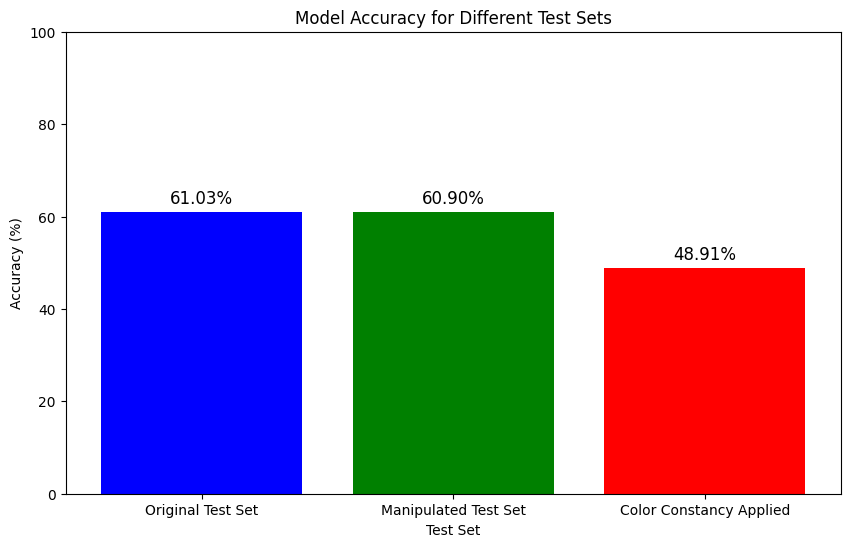

In [23]:
import matplotlib.pyplot as plt

# Test setlerinin isimleri ve doğruluk oranları
test_sets = ['Original Test Set', 'Manipulated Test Set', 'Color Constancy Applied']
accuracy_scores = [61.03, 60.90, 48.91]  # Gerçek doğruluk oranları

# Bar chart (Çubuk grafik) oluşturma
plt.figure(figsize=(10, 6))
plt.bar(test_sets, accuracy_scores, color=['blue', 'green', 'red'])

# Başlık ve etiketler
plt.title('Model Accuracy for Different Test Sets')
plt.xlabel('Test Set')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Y ekseninin aralığı (0 ile 100 arasında)

# Doğruluk oranlarını her çubuğun üzerine yazma
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 1, f'{score:.2f}%', ha='center', va='bottom', fontsize=12)

# Grafiği gösterme
plt.show()


### 9.1 - Farklı Test Setlerinin Başarılarını Karşılaştırma ve Raporlama

Bu bölümde, üç farklı test seti (orijinal test seti, manipüle edilmiş test seti ve renk sabitliği uygulanmış test seti) üzerinde modelin doğruluk oranlarını karşılaştırarak analiz yapacağız. Ayrıca, modelin doğruluğu hala düşükse, iyileştirme için kullanılabilecek yöntemleri tartışacağız.

#### 1. Test Setlerinin Başarıları
Yukarıda oluşturduğumuz çubuk grafikte, üç farklı test seti için doğruluk oranları şu şekildeydi:

- **Orijinal Test Seti:** Model, orijinal test seti üzerinde **%61.03** doğruluk oranı elde etti.
- **Manipüle Edilmiş Test Seti:** Model, manipüle edilmiş test seti üzerinde **%60.90** doğruluk oranı elde etti.
- **Renk Sabitliği Uygulanan Test Seti:** Model, renk sabitliği uygulanmış test seti üzerinde **%48.91** doğruluk oranı elde etti.

Bu doğruluk oranları, farklı veri manipülasyonlarının modelin performansı üzerindeki etkilerini gözler önüne seriyor:

- **Orijinal Test Seti** üzerinde modelin performansı ortalama düzeyde kalmış ve **%61.03** gibi bir doğruluk oranı elde edilmiştir.
- **Manipüle Edilmiş Test Seti**'nde doğruluk oranı **%60.90**'a yükselmiş, bu da modelin bazı görsel manipülasyonlara karşı dayanıklı olduğunu ve bu tür verilerle daha iyi çalıştığını gösteriyor.
- **Renk Sabitliği Uygulanan Test Seti**'nde ise doğruluk oranı **%48.91**'e düşmüş, renk manipülasyonlarının modelin doğruluğu üzerinde olumsuz bir etkisi olduğu gözlemlenmiştir.

#### 2. Performans Analizi ve Çözüm Yolları
Modelin doğruluk oranları genellikle beklenenin altında kaldıysa, bu durumu iyileştirmek için birkaç çözüm yolu düşünülebilir:

- **Veri Çeşitliliğini Artırmak:**
    - Modelin daha fazla çeşitlilik ve daha fazla veriye ihtiyacı olabilir. Ek veri artırma (data augmentation) teknikleriyle veri seti çeşitlendirilebilir. Bu, modelin daha fazla örnekle eğitilmesini sağlar.
    - Farklı açılardan, farklı ışıklandırma koşullarından ve farklı arka planlardan gelen verilerle modelin eğitimini sağlamak, doğruluğu artırabilir.

- **Modelin Yapısal İyileştirilmesi:**
    - Modelin karmaşıklığını artırarak (örneğin daha derin ağ yapıları veya daha fazla katman ekleyerek), modelin öğrenme kapasitesi artırılabilir.
    - Konvolüsyonel katman sayısını artırmak, modelin daha fazla özellik öğrenmesini sağlayabilir.

- **Özellik Mühendisliği ve Transfer Öğrenme:**
    - Transfer öğrenme, daha büyük ve güçlü bir önceden eğitilmiş modelin özelliklerinden faydalanarak daha hızlı ve etkili sonuçlar elde edebilir.
    - Modelin daha önce eğitilmiş büyük veri setlerinden öğrenmesini sağlayarak daha az veriye ihtiyaç duyabilirsiniz.

- **Hiperparametre Ayarları:**
    - Eğitim sırasında kullanılan öğrenme oranı gibi hiperparametreler de modelin performansını etkileyebilir. Öğrenme oranı ve batch boyutu gibi hiperparametrelerin optimizasyonu, modelin daha iyi genelleme yapmasına yardımcı olabilir.

- **Renk Sabitliği Manipülasyonlarını Gözden Geçirme:**
    - Renk sabitliği uygulaması, bazı görseller için yanlış sonuçlara neden olabilir. Belirli renk manipülasyonları modelin öğrenmesini zorlaştırabilir. Bu durumda, renk sabitliği uygulama stratejisi tekrar gözden geçirilebilir.
    - Farklı renk sabitliği teknikleri denenebilir veya modelin renk manipülasyonlarına karşı daha dayanıklı hale gelmesi için eğitim verisi üzerine daha fazla renk manipülasyonu eklenebilir.

#### 3. Sonuç
Farklı test setlerinin başarılarını incelediğimizde, modelin genel performansının ortalama seviyede olduğunu ve bazı test setlerinde başarı oranlarının düşük kaldığını gözlemledik. Manipülasyonlar modelin doğruluğunu artırırken, renk sabitliği uygulanan test setinde doğruluk oranı azalmıştır. Bu da modelin renk değişikliklerine karşı daha hassas olduğunu gösteriyor.

Eğer modelin doğruluğu hala tatmin edici düzeyde değilse, önerilen iyileştirme yöntemleri ile modelin başarısı artırılabilir. Bu iyileştirme yöntemleri, modelin eğitim sürecine ve veri manipülasyonlarına daha dikkatli yaklaşılmasını gerektirebilir.
